
✅ Clasificación:
               precision    recall  f1-score   support

      Cloudy       0.86      0.86      0.86        70
        Rain       0.91      0.87      0.89        70
       Shine       0.88      0.93      0.90        70
     Sunrise       0.97      0.96      0.97        72

    accuracy                           0.90       282
   macro avg       0.90      0.90      0.90       282
weighted avg       0.90      0.90      0.90       282



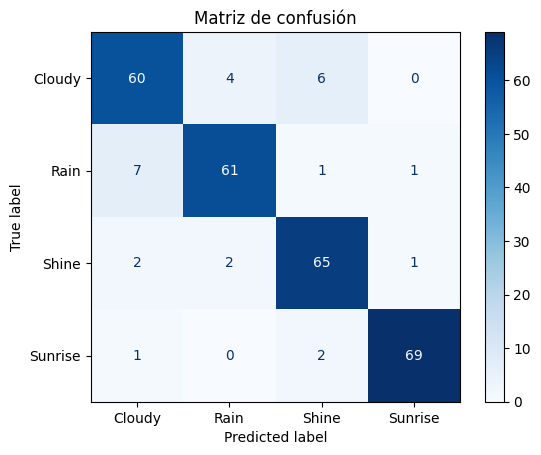

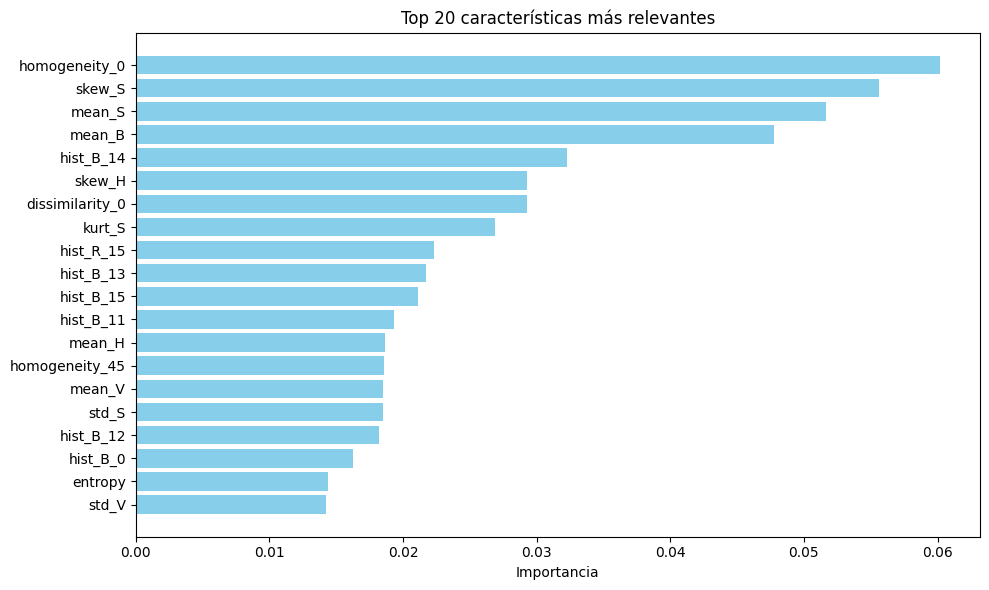

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Ruta a tu CSV
#csv_path = r"C:\Users\bra\OneDrive - Universidad de Antioquia\Documentos\inteligencia\dataset_balanceado\caracteristicas_300.csv"
csv_path = r"/content/drive/MyDrive/fic/proyecto/Multi-class Weather Dataset/caracteristicas_300.csv"

# 1. Cargar el CSV
df = pd.read_csv(csv_path)

# 2. Separar características numéricas y etiquetas
X = df.drop(columns=["filename", "class", "class_index"])  # variables predictoras
y = df["class"]  # variable objetivo

# 3. Dividir en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4. Entrenar modelo base RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Evaluar el modelo
y_pred = model.predict(X_test)
print("\n✅ Clasificación:\n", classification_report(y_test, y_pred))

# 6. Mostrar matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de confusión")
plt.show()

# 7. Importancia de características
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"feature": features, "importance": importances})
top20 = importance_df.sort_values(by="importance", ascending=False).head(20)

# 8. Graficar top 20 características
plt.figure(figsize=(10, 6))
plt.barh(top20["feature"], top20["importance"], color="skyblue")
plt.xlabel("Importancia")
plt.title("Top 20 características más relevantes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
